## Jupyter Lab and ipywidgets - Animated Figures Demo

### Displaying Multiple Matplotlib Figures and an Animated Sine Wave

#### An Animated Sine Wave

First, we create widgets for the frequency and amplitude of the sine wave.

In [5]:
import ipywidgets as widgets
from IPython.display import display

# Initialize global variables
global freq, amplitude
freq = 1.0
amplitude = 1.0

# Define the interactive control functions
def update_freq(change):
   global freq
   freq = change['new']

def update_amplitude(change):
   global amplitude
   amplitude = change['new']

# Create sliders for frequency and amplitude
freq_slider = widgets.FloatSlider(value=freq, min=0.1, max=5.0, step=0.1, description='Frequency')
amplitude_slider = widgets.FloatSlider(value=amplitude, min=0.1, max=2.0, step=0.1, description='Amplitude')

freq_slider.observe(update_freq, names='value')
amplitude_slider.observe(update_amplitude, names='value')

# Display the controls
display(widgets.VBox([freq_slider, amplitude_slider]))

Next, we create the animated sine wave plot. The following cell will display an animated plot, which will be animated only as long as the cell is running. Changes to the sliders above are applied only when the cell is not running.

It is surprisingly difficult to create real live figures within Jupyter:

I could not manage to get the updates to the widgets to propagate to the figure while it is being updated or to have a stop button that triggers while updating the figure. This is probably due to the fact that it runs with only one thread and has to handle communication between JavaScript and Python.

I tried other alternatives such as `ProgressPlot`, or `matplotlib.animation`, but they all have this issue (they cannot receive widget updates while running). ProgressPlot has a much better performance, though.

So, being aware that when you run the cell below, it will display an animated figure, and run for a few seconds, you have to wait until it is finished. The refresh rate is quite slow at about 1 or 2 FPS.

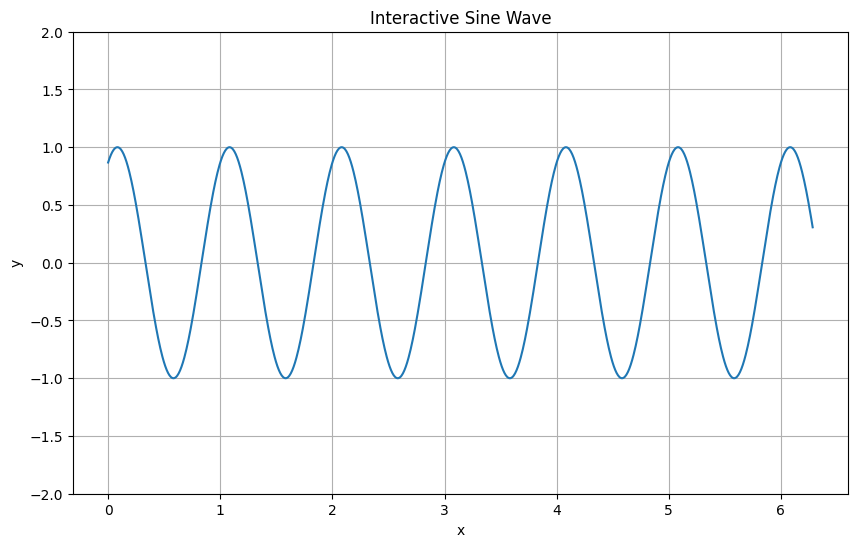

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

# Retrieve the updated values from the sliders
freq = freq_slider.value
amplitude = amplitude_slider.value

# Animation loop for the sine wave
x = np.linspace(0, 2 * np.pi, 1000)
for i in range(200):
   phase = i * 0.1  # Update phase over time
   y = amplitude * np.sin(2 * np.pi * freq * x + phase)

   plt.figure(figsize=(10, 6))
   plt.plot(x, y)
   plt.ylim(-2, 2)
   plt.title('Interactive Sine Wave')
   plt.xlabel('x')
   plt.ylabel('y')
   plt.grid(True)
   plt.show()

   # time.sleep(1 / 30)  # Update at ~30 FPS
   clear_output(wait=True)

#### Histogram Parameters and Interactive Plot

First, we create widgets for the number of bars, mean, standard deviation, average, and the number of data points, and then we define the function to update the histogram interactively.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, clear_output

# Define the function to update the histogram
def update_histogram(n_bars, mu, sigma, average, nb_data):
    # Generate the histogram data
    data = np.random.normal(mu, sigma, int(nb_data)) + average
    bins = np.linspace(np.min(data), np.max(data), n_bars)

    # Clear the previous output and plot the new histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, color='blue', alpha=0.7)
    plt.title('Interactive Histogram')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Create interactive widgets
n_bars_slider = widgets.IntSlider(value=80, min=1, max=300, step=1, description='Number of Bars')
mu_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='Mean')
sigma_slider = widgets.FloatSlider(value=1, min=0.1, max=5, step=0.1, description='Std Dev')
average_slider = widgets.FloatSlider(value=500, min=0, max=1000, step=10, description='Average')
nb_data_slider = widgets.IntSlider(value=6000, min=100, max=10000, step=100, description='Number of Data Points')

# Display interactive widgets and the plot
interact(update_histogram, n_bars=n_bars_slider, mu=mu_slider, sigma=sigma_slider, average=average_slider, nb_data=nb_data_slider)

interactive(children=(IntSlider(value=80, description='Number of Bars', max=300, min=1), FloatSlider(value=0.0…

<function __main__.update_histogram(n_bars, mu, sigma, average, nb_data)>

#### Interactive Gaussian Heatmap with Widgets

We create widgets for the Gaussian heatmap parameters and use the `interact` function to update the heatmap interactively.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from matplotlib.colors import Colormap

# Define the function to update the Gaussian heatmap
def update_heatmap(mean, variance, colormap, levels):
    x = y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.exp(-((X - mean) ** 2 + (Y - mean) ** 2) / (2 * variance))

    plt.figure(figsize=(10, 6))
    contour = plt.contourf(X, Y, Z, levels, cmap=colormap)
    plt.colorbar(contour)
    plt.title('Interactive Gaussian Heatmap')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

# Create interactive widgets
mean_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='Mean')
variance_slider = widgets.FloatSlider(value=1, min=0.1, max=5, step=0.1, description='Variance')
levels_slider = widgets.IntSlider(value=10, min=1, max=20, step=1, description='Levels')
colormap_dropdown = widgets.Dropdown(
    options=['viridis', 'plasma', 'inferno', 'magma', 'cividis'],
    value='viridis',
    description='Colormap'
)

# Display interactive widgets and the plot
interact(update_heatmap, mean=mean_slider, variance=variance_slider, colormap=colormap_dropdown, levels=levels_slider)

interactive(children=(FloatSlider(value=0.0, description='Mean', max=5.0, min=-5.0), FloatSlider(value=1.0, de…

<function __main__.update_heatmap(mean, variance, colormap, levels)>

#### Interactive Data Smoothing with Widgets

We create a widget for the window size of the moving average filter and use the `interact` function to update the data smoothing plot interactively.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Define the function to update the data smoothing plot
def update_data_smoothing(window_size):
    x = np.linspace(0, 15, 300)
    y = np.sin(x) + np.random.normal(0, 0.1, 300)  # Noisy sine wave
    y_smooth = np.convolve(y, np.ones(window_size) / window_size, mode='same')

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Original')
    plt.plot(x, y_smooth, label='Smoothed')
    plt.title('Data Smoothing')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widget
window_size_slider = widgets.IntSlider(value=5, min=1, max=40, step=1, description='Window Size')

# Display interactive widget and the plot
interact(update_data_smoothing, window_size=window_size_slider)

interactive(children=(IntSlider(value=5, description='Window Size', max=40, min=1), Output()), _dom_classes=('…

<function __main__.update_data_smoothing(window_size)>